# Task 6: Interpret the Significance of Promoter-Enhancer Predictions (Part 2)
## Enhance the normalization to highlight features that are simultaneously highly conserved and substantially reported
- For better visualization, enlarge bins (i.e. enlarge columns on R plot);  
- Normalize according to the p-value of the score disctribution;  
- Multiply conservation score by count score;  

# [phyloP score](https://ionreporter.thermofisher.com/ionreporter/help/GUID-E60077AC-43D4-4058-8A0D-BAA83E77C693.html):
phyloP scores measure evolutionary conservation at individual alignment sites.  
1. Positive scores — Measure conservation, which is slower evolution than expected, at sites that are predicted to be conserved.  
2. Negative scores — Measure acceleration, which is faster evolution than expected, at sites that are predicted to be fast-evolving.  
*The absolute values of the scores represent -log p-values under a null hypothesis of neutral evolution.*

**LiftOver:**

hg38|hg37
:---:|:---:
chrX:15,200,000-15,800,000|chrX:15,218,122-15,818,123

PhyloP scores in bigWig format files: **hg19.100way.phyloP100way.bw**  
PhyloP scores in fixed step wiggle format: **hg19.100way.phyloP100way/*.wigFix.gz - phyloP scores for all 100 species**  
- For a description of the fixed step wiggle data file format, see:
http://genome.ucsc.edu/goldenPath/help/phastCons.html  

Column #1 contains a one-based position coordinate. Column #2 contains a score showing the posterior probability that the phylogenetic hidden Markov model (HMM) of phastCons is in its most conserved state at that base position.

#### Extracting data from bigWig format: http://genome.ucsc.edu/goldenPath/help/bigWig.html  
> - Download http://hgdownload.soe.ucsc.edu/admin/exe/

## [How to adjust p-values?](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6099145/):
**Option #1:** Bonferroni: Using the p.adjust function and the ‘method’ argument set to "bonferroni"  
**Option #2:** Benjamini and Hochberg: Using the p.adjust function and the 'method' argument set to "fdr"  

# Approaches to conservation data handling:
## 1. Average-based over binned region (500 bps)
### a. Using phyloP scores:
- Obtain **phyloP100way** data for the region chrX:15,200,000-15,800,000 using UCSC Table Browser. This must be done for every 100 kbps for a total of 6 downloads. *Note that there will be a loss in score resolution due to compression.*  
- Using Kutools, identify missing data and insert empty row to replace that base position.  
- This data attributes scores per nucleotide. For 500 bps bins, take the average score for every 500 entries with a sliding window of 250 bps. 

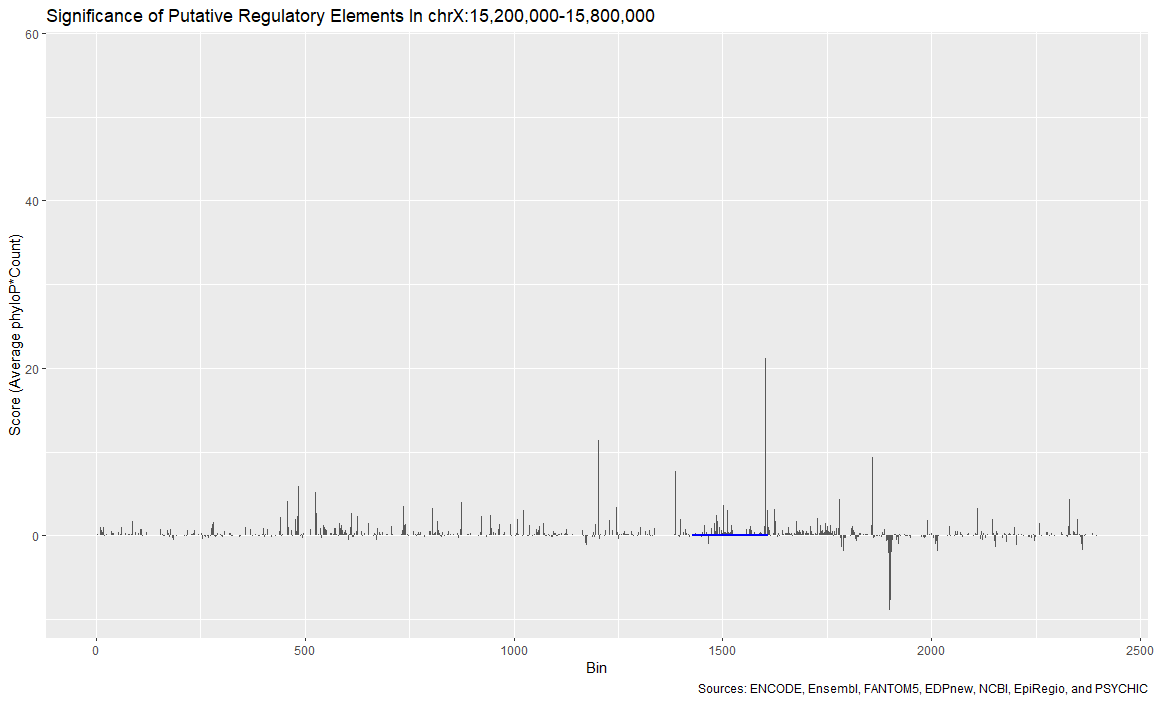

### b. Using phastCons scores:
- Obtain **phastCons100way** data for the region chrX:15,200,000-15,800,000 using UCSC Table Browser. This must be done for every 100 kbps for a total of 6 downloads. *Note that there will be a loss in score resolution due to compression.*  
- Using Kutools, identify missing data and insert empty row to replace that base position.  
- This data attributes scores per nucleotide. For 500 bps bins, take the average score for every 500 entries with a sliding window of 250 bps.  

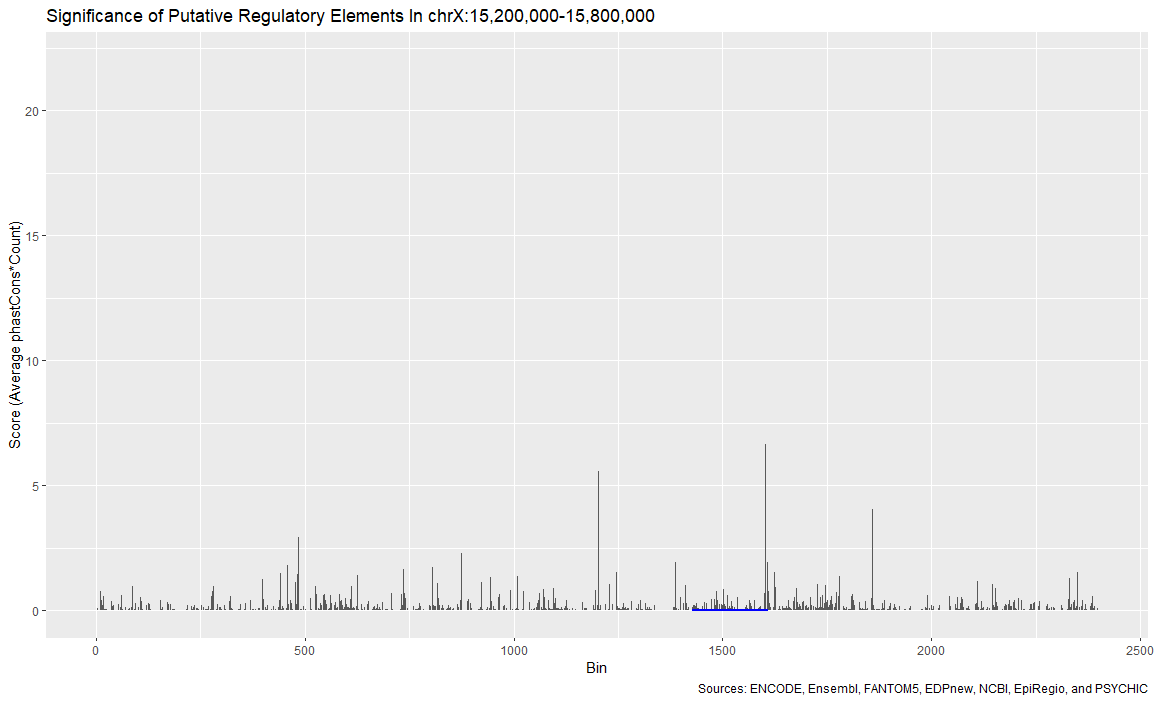

## 2. Threshold-based for single nucleotides (1 bp)
- The count score now applies to single nucleotides (e.g. if a regulatory element spans chrX:15,200,000-15,200,050, all 50 base pairs in that region will recieve an additional count score of one)

### a. Using phyloP scores:

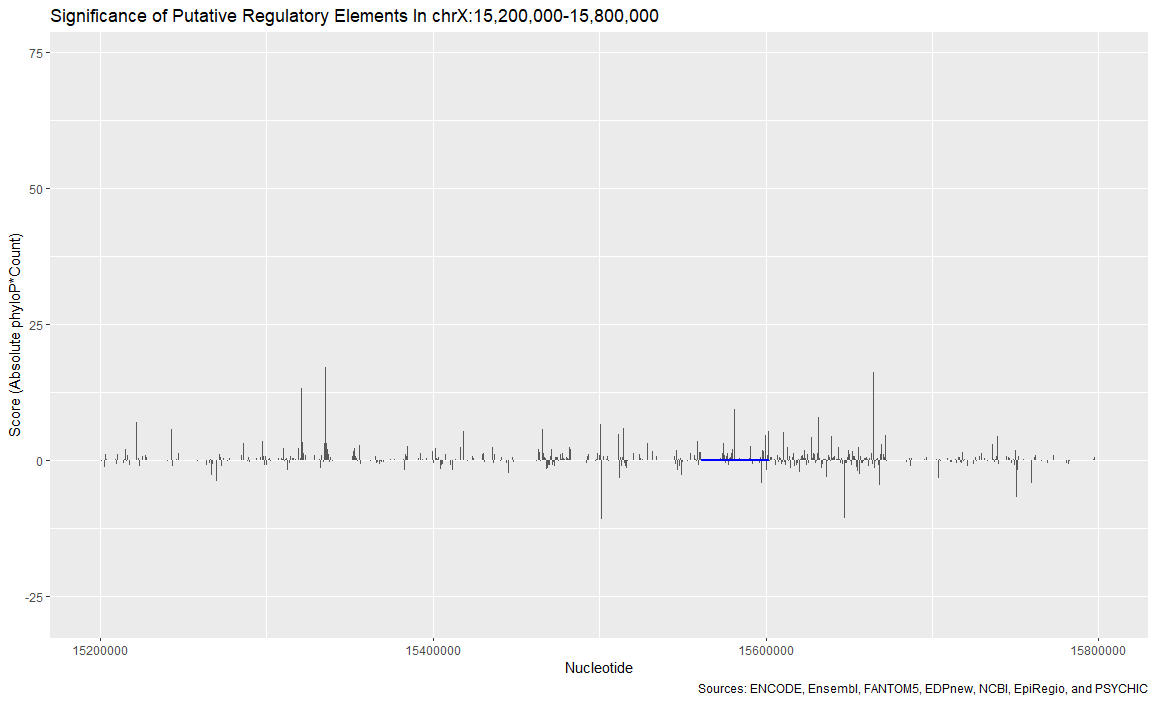

### b. Using phastCons scores:

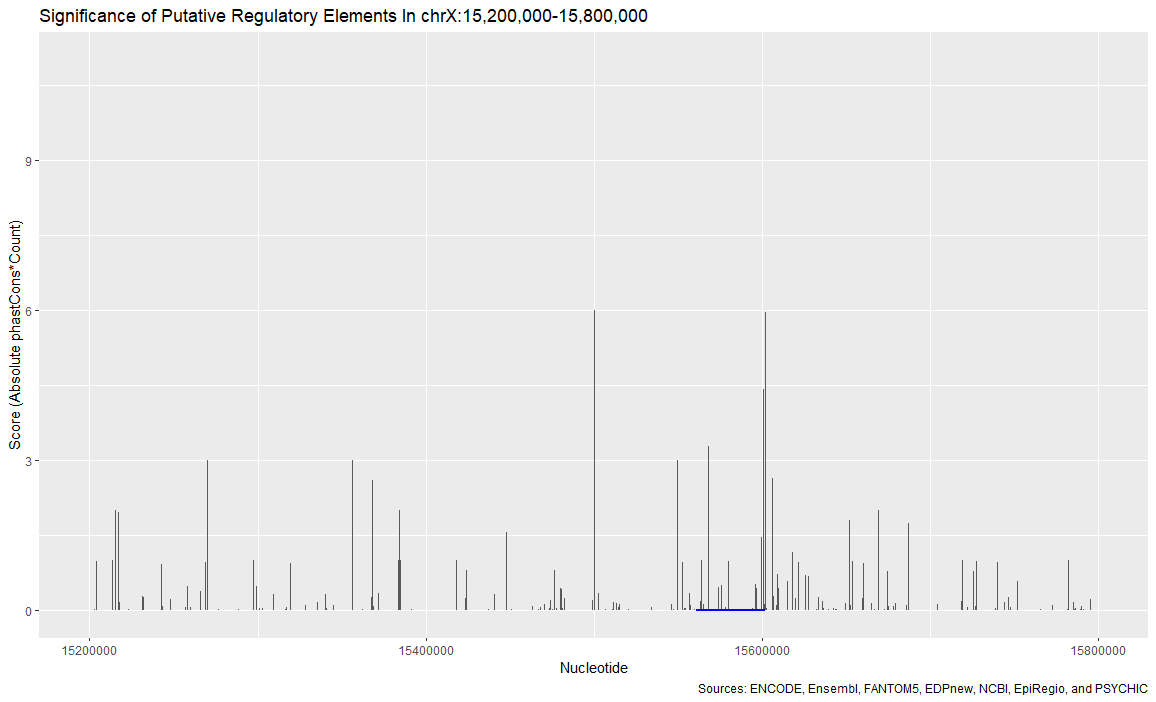

# Enhancing count significance:
- To enhance values with higher count, the count_score becomes **k*count**, where k is a multiplier (e.g. 2).  
***Example:*** If k = 2, a count of 1 recieves a count_score of 2 while a count of 4 recieves a count_score of 8. 

## Rescaling phyloP scores:

Minimum|Maximum
:--:|:--:
-20|10.003

# GUD: Genomic Unification Database
- Installation: https://github.com/wassermanlab/GUD  
- Region to Enhancer: https://github.com/wassermanlab/GUD/blob/master/GUD/scripts/region2enhancer.py  
- Genomic Feature: https://github.com/wassermanlab/GUD/blob/master/GUD/ORM/genomic_feature.py

> - compute_profile: populates your rows of 1s and 0s, provided a list of intervals.  
> - compute_regions: given a profile (i.e. the collapsed matrix) and a threshold, identifies regions of a minimum length that score above a given threshold (e.g. 0.6 for conservation).
> - stitch_regions: if stitch is set to True, it will stitch individual regions together if they would score above the threshold.  

For a given region, create a matrix of 1s and 0s where rows are types of genomics data (e.g. open chromatin, conservation, etc.) and cols are nucleotide positions within that region. A 1 is assigned if a nucleotide overlaps a type of genomic data, or 0 otherwise.  
Once you have this matrix, YOU collapse it such that high scoring positions correspond to nucleotides that are likely to be enhancers.


# PHAST: Phylogenetic Analysis with Space/Time Models
- Installation: https://github.com/cshlsiepellab/phast/